<a href="https://colab.research.google.com/github/GETHUB55/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_07_CNN%EA%B8%B0%EC%B4%88_Pooling_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.07 CNN기초 - Pooling Layer
---

* 날짜:07-27
* 이름:조수빈

## 학습내용
    - CNN의 개념을 이해한다.
    - 텐서플로우를 이용해 CNN을 구성한다.
    - CNN 모델을 이용해 손글씨 이미지를 분류한다.
    - CNN의 feature map에 대해 이해한다.

## 데이터셋

* MNIST

```
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
```

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Pooling layer
---

풀링(Pooling) 연산은 커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만, 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않습니다. 일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적입니다. 


In [ ]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

### **| 맥스 풀링(Max Pooling)**
맥스풀링은 이미지 영역의 최대값 만을 출력값으로 가지는 연산 방법입니다. 



<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0107-01.PNG?raw=true width=400>
</p>



In [ ]:
# (16) -> (1,4,4,1)
x = np.array([1,0,1,1,1,2,0,0,1,0,1,0,0,0,1,1]).reshape(1,4,4,1)
print(x[0,:,:,0],x.shape)
y = MaxPool2D(pool_size=2, strides=1)(x) #pool_sizes는 굵은박스
print(y[0,:,:,0],y.shape)

[[1 0 1 1]
 [1 2 0 0]
 [1 0 1 0]
 [0 0 1 1]] (1, 4, 4, 1)
tf.Tensor(
[[2 2 1]
 [2 2 1]
 [1 1 1]], shape=(3, 3), dtype=int64) (1, 3, 3, 1)


### **| 평균 풀링(Average Pooling)**


평균풀링은 이미지 영역의 평균값 을 출력값으로 가지는 연산 방법입니다. 


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0107-02.PNG?raw=true width=400>
</p>





In [ ]:
# (16) -> (1,4,4,1)
x = np.array([1,0,1,1,1,2,0,0,1,0,1,0,0,0,1,1], dtype='float16').reshape(1,4,4,1)
print(x[0,:,:,0],x.shape)
y = AvgPool2D(pool_size=2, strides=1)(x) 
print(y[0,:,:,0],y.shape)

[[1. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]] (1, 4, 4, 1)
tf.Tensor(
[[1.   0.75 0.5 ]
 [1.   0.75 0.25]
 [0.25 0.5  0.75]], shape=(3, 3), dtype=float32) (1, 3, 3, 1)


## LeNet-5
---

LeNet-5[(논문)](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) 구조는 아마도 가장 널리 알려진 CNN 구조일 것입니다. 이 구조는 1998년 얀 르쿤이 만들었으며 손글씨 숫자 인식(MNIST)에 널리 사용되었습니다. 


![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

### | LeNet-5을 이용한 손글씨 이미지 분류

####  **데이터 준비**

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#전처리-정규화
x_train,x_test = x_train/255.0,x_test/255.0
#전처리-shape 맞추기
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


#### **모델 구성**

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
def create_lenet():
  x = layers.Input(shape=(28,28,1))
  y = layers.Conv2D(filters=6, 
                    kernel_size=5 , padding = 'same',
                    activation='tanh'
                    )(x)
  y = layers.AvgPool2D(pool_size=2, strides=2)(y)    #subsampling          
  y = layers.Conv2D(filters=16, 
                    kernel_size=5 , padding = 'valid',
                    activation='tanh'
                    )(y) 
  y = layers.MaxPool2D(pool_size=2, strides=2)(y)
  y = layers.Flatten()(y)
  y = layers.Dense(120, activation= 'tanh')(y)  
  y = layers.Dense(84, activation= 'tanh')(y)                                                                       
  y = layers.Dense(10, activation= 'softmax')(y)

  model = models.Model(x,y,name='LeNet-5') 
  return model    

lenet = create_lenet()
lenet.summary()                    

Model: "LeNet-5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0   

#### **학습 및 평가**

In [ ]:
lenet.compile(loss= 'sparse_categorical_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])
lenet.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 3ms/step - loss: 0.5341 - acc: 0.8610
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1826 - acc: 0.9486
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1278 - acc: 0.9631
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1003 - acc: 0.9715
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0842 - acc: 0.9759
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0730 - acc: 0.9792
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0649 - acc: 0.9816
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0588 - acc: 0.9831
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0538 - acc: 0.9844
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0494 - acc: 0.9858


### **| Feature map**

#### **feature map 얻기**

#### **시각화**

![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

[시각화 함수 스크립트](https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/scripts/featuremap_dict.py)

## 과제 1. 의류 이미지 분류
---
* 데이터셋 : f-minst(fashoin mnist)
* 데이터를 소개하세요.
* 데이터의 형태를 파악하세요
* 적절한 모델을 생성하세요
* 데이터에 적합하게 학습을 진행하세요.

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


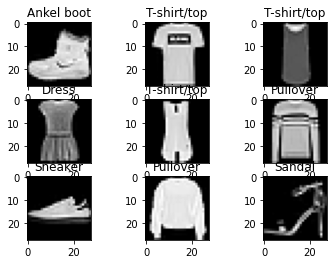

In [ ]:
# 데이터구경(for문)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(labels[y_train[i]] )

In [ ]:
labels = ['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankel boot']

(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

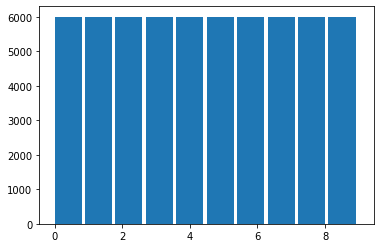

In [ ]:
plt.hist(y_train, width=0.8)

In [ ]:
#전처리-정규화
x_train,x_test = x_train/255.0,x_test/255.0
#전처리-shape 맞추기
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [ ]:
#모델 만들기
#모델 학습
#모델 예측 결과
def create_fmnist():
  x = layers.Input(shape=(28,28,1))
  y = layers.Conv2D(filters=6, 
                    kernel_size=5 , padding = 'same',
                    activation='tanh'
                    )(x)
  y = layers.AvgPool2D(pool_size=2, strides=2)(y)    #subsampling          
  y = layers.Conv2D(filters=16, 
                    kernel_size=5 , padding = 'valid',
                    activation='tanh'
                    )(y) 
  y = layers.MaxPool2D(pool_size=2, strides=2)(y)
  y = layers.Flatten()(y)
  y = layers.Dense(120, activation= 'tanh')(y)  
  y = layers.Dense(84, activation= 'tanh')(y)                                                                       
  y = layers.Dense(10, activation= 'softmax')(y)

  model = models.Model(x,y,name='fashion') 
  return model    

fashion = create_fmnist()
fashion.summary()    

Model: "fashion"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_3 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0   

In [ ]:
fashion.compile(loss= 'sparse_categorical_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])
fashion.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6298 - acc: 0.7850
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4212 - acc: 0.8479
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3781 - acc: 0.8630
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3429 - acc: 0.8746
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3266 - acc: 0.8807
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3179 - acc: 0.8830
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3034 - acc: 0.8892
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2971 - acc: 0.8917
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2991 - acc: 0.8898
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2856 - acc: 0.8954


(10000, 10)
정답: Ankel boot
예측: [2.0400321e-05 7.3729225e-06 2.4855013e-05 1.0147824e-04 5.1215843e-06
 7.6669999e-03 3.5954436e-05 1.5074574e-02 7.3376083e-05 9.7698987e-01]


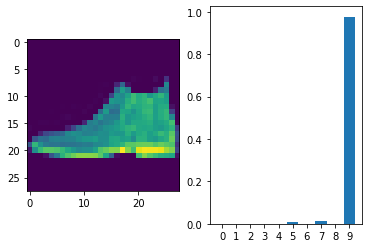

In [ ]:
y_pred = fashion.predict(x_test)
print(y_pred.shape)
#0번째 샘플에 대해
print('정답:',labels[y_test[0]])
print('예측:',y_pred[0])
plt.subplot(121)
plt.imshow(x_test[0])
plt.subplot(122)
plt.bar(range(10), y_pred[0])
plt.xticks(range(10))
plt.show()

In [ ]:
y_argmax = np.argmax(y_pred, axis=1)
print(y_argmax[0])

9


정답: Ankel boot
예측: Ankel boot


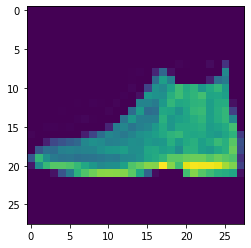

정답: Pullover
예측: Pullover


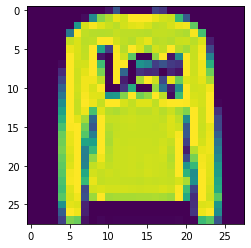

정답: Trouser
예측: Trouser


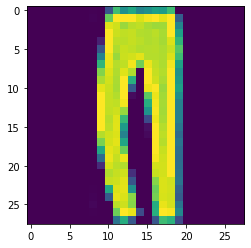

정답: Trouser
예측: Trouser


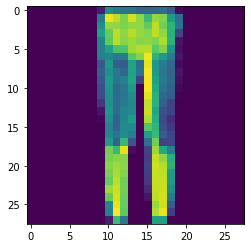

정답: Shirt
예측: Shirt


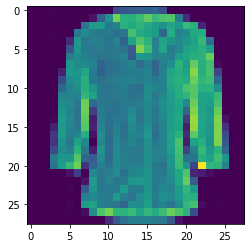

정답: Trouser
예측: Trouser


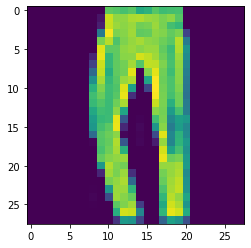

정답: Coat
예측: Coat


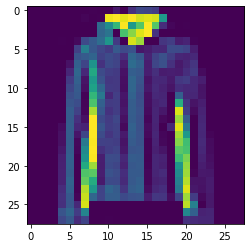

정답: Shirt
예측: Shirt


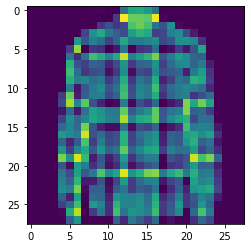

정답: Sandal
예측: Sandal


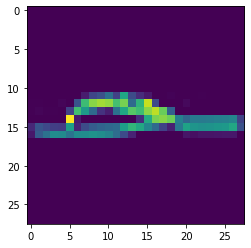

정답: Sneaker
예측: Sneaker


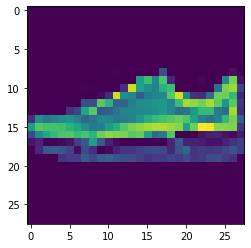

정답: Coat
예측: Coat


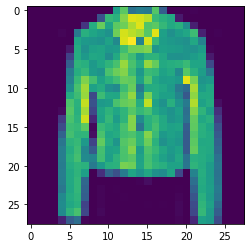

정답: Sandal
예측: Sandal


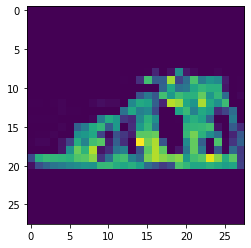

정답: Sneaker
예측: Sneaker


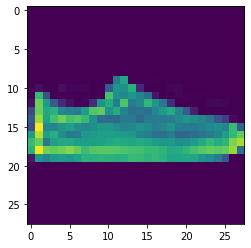

정답: Dress
예측: Dress


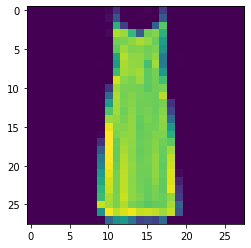

정답: Coat
예측: Coat


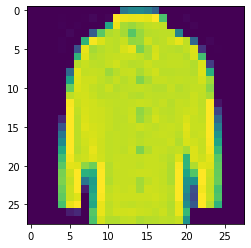

정답: Trouser
예측: Trouser


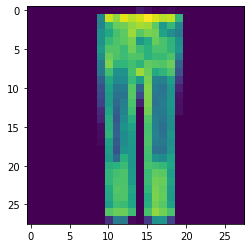

정답: Pullover
예측: Pullover


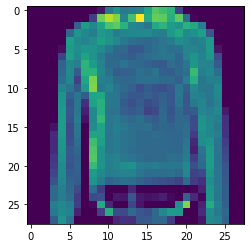

정답: Coat
예측: Coat


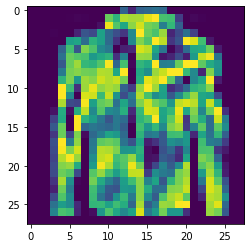

정답: Bag
예측: Bag


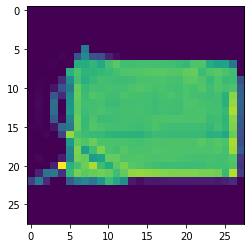

정답: T-shirt/top
예측: T-shirt/top


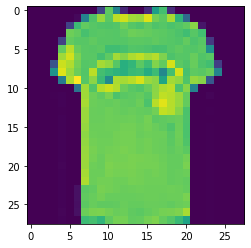

정답: Pullover
예측: Pullover


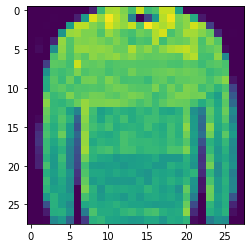

정답: Sandal
예측: Sandal


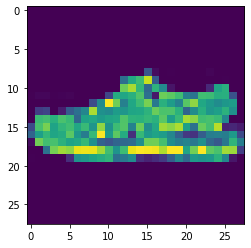

정답: Sneaker
예측: Sneaker


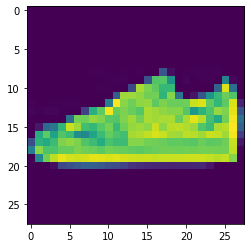

정답: Ankel boot
예측: Sandal


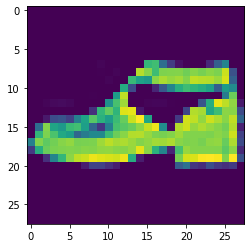

정답: Trouser
예측: Trouser


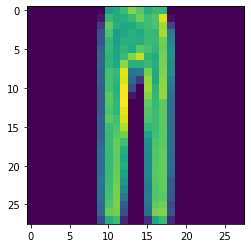

정답: Coat
예측: Pullover


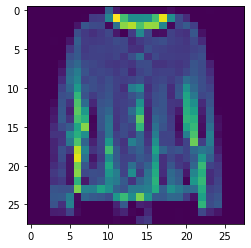

정답: Shirt
예측: Shirt


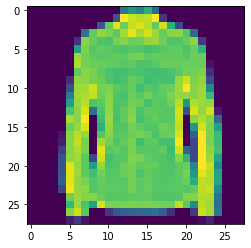

정답: T-shirt/top
예측: T-shirt/top


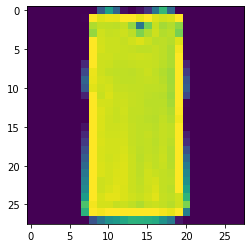

정답: Ankel boot
예측: Ankel boot


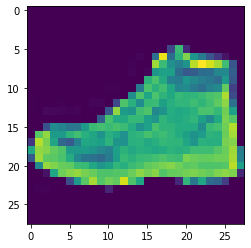

정답: Dress
예측: Coat


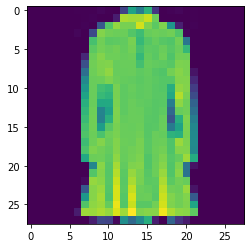

정답: Bag
예측: Bag


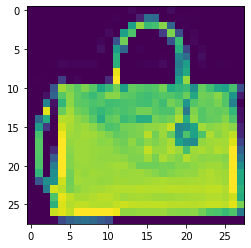

정답: Bag
예측: Bag


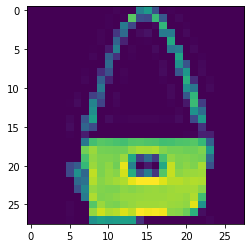

정답: Dress
예측: Dress


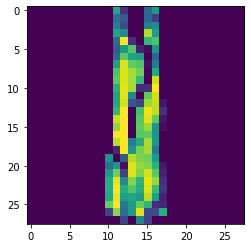

정답: Dress
예측: Dress


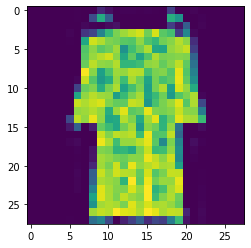

정답: Bag
예측: Bag


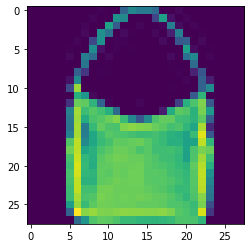

정답: T-shirt/top
예측: T-shirt/top


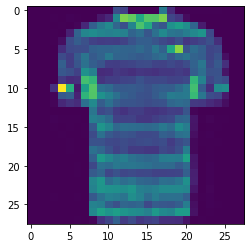

정답: Sneaker
예측: Sneaker


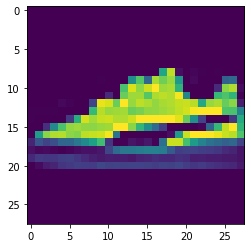

정답: Sandal
예측: Sandal


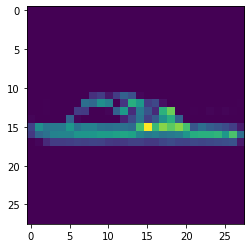

정답: Sneaker
예측: Sneaker


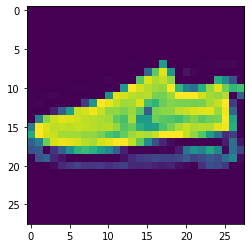

정답: Ankel boot
예측: Ankel boot


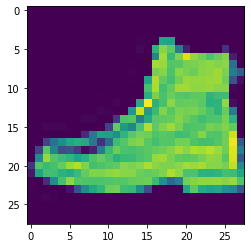

정답: Shirt
예측: T-shirt/top


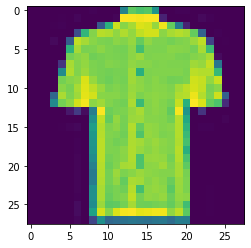

정답: Trouser
예측: Trouser


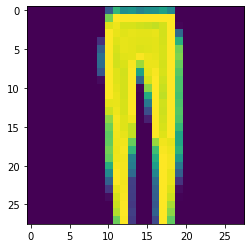

정답: Dress
예측: Shirt


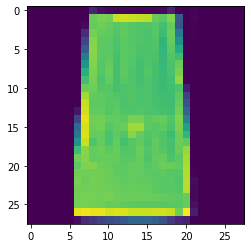

정답: Sneaker
예측: Sneaker


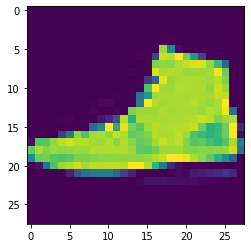

정답: Shirt
예측: Shirt


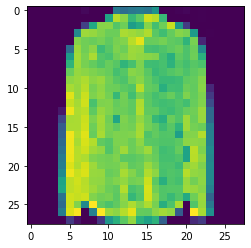

정답: Sneaker
예측: Sneaker


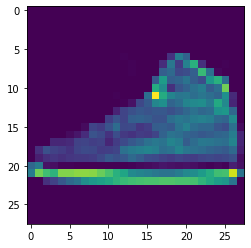

정답: Pullover
예측: Pullover


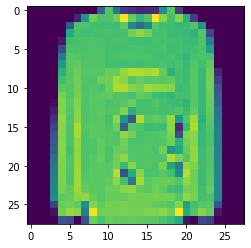

정답: Trouser
예측: Trouser


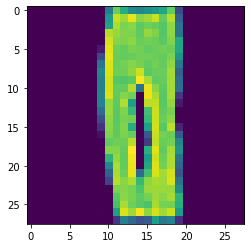

정답: Pullover
예측: Pullover


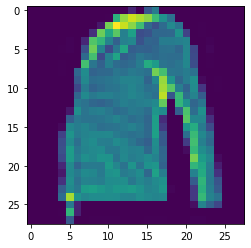

정답: Pullover
예측: Shirt


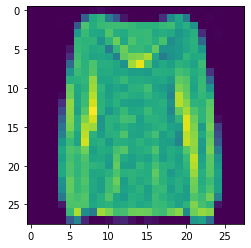

정답: Coat
예측: Coat


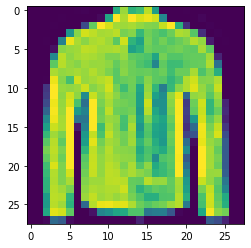

정답: Coat
예측: Coat


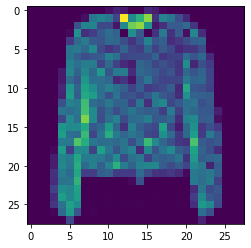

정답: Sandal
예측: Sandal


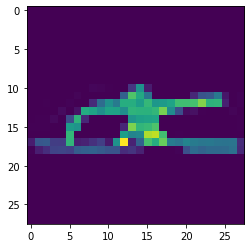

정답: Bag
예측: Bag


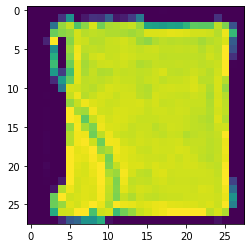

정답: Pullover
예측: Pullover


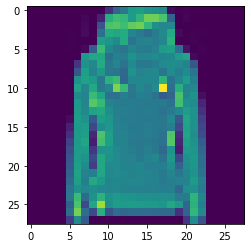

정답: Pullover
예측: Pullover


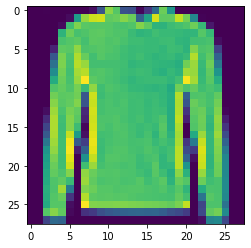

정답: Bag
예측: Bag


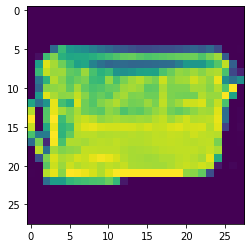

정답: Coat
예측: Shirt


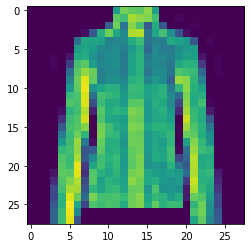

정답: Bag
예측: Bag


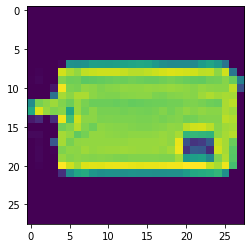

정답: T-shirt/top
예측: T-shirt/top


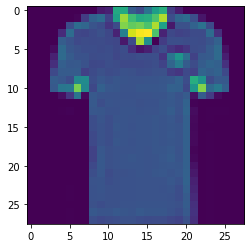

정답: Sneaker
예측: Sneaker


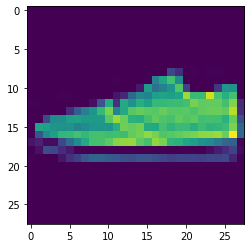

정답: Sneaker
예측: Sneaker


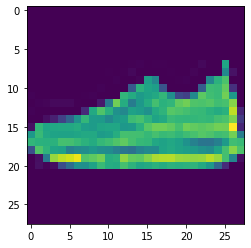

정답: Bag
예측: Bag


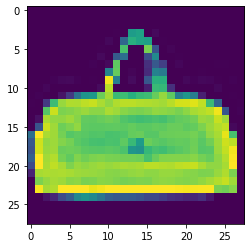

정답: Sandal
예측: Sandal


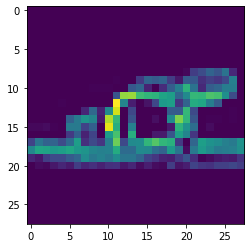

정답: Trouser
예측: Trouser


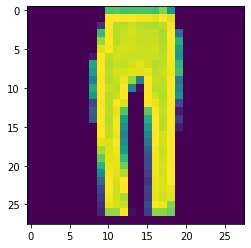

정답: Trouser
예측: Trouser


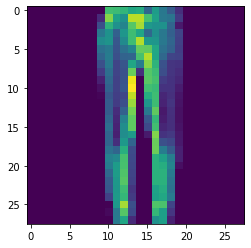

정답: Pullover
예측: Pullover


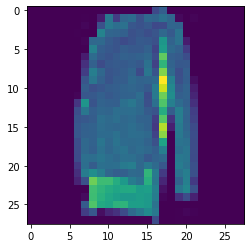

정답: Dress
예측: Coat


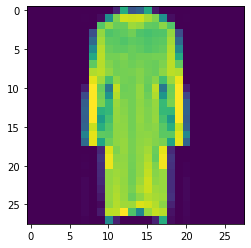

정답: Ankel boot
예측: Sneaker


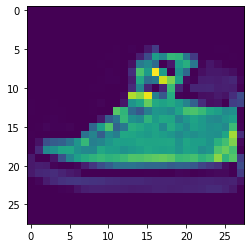

정답: Bag
예측: Bag


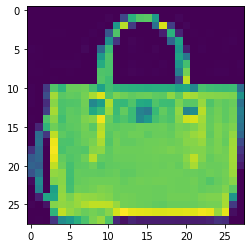

정답: Sneaker
예측: Sneaker


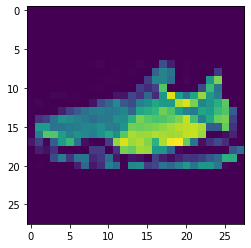

정답: T-shirt/top
예측: T-shirt/top


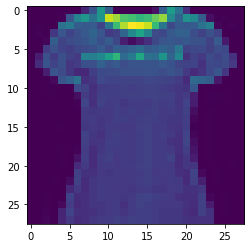

정답: Pullover
예측: Pullover


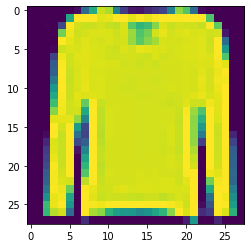

정답: Shirt
예측: Shirt


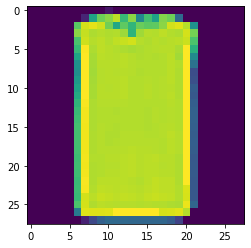

정답: Pullover
예측: Pullover


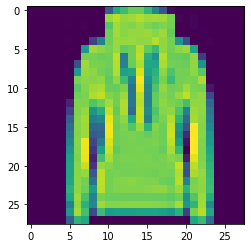

정답: Dress
예측: Dress


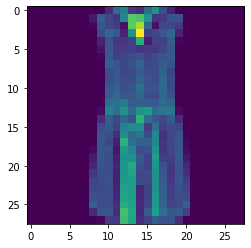

정답: Trouser
예측: Trouser


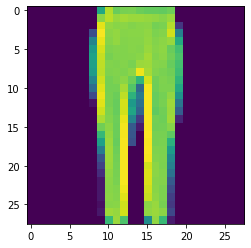

정답: Pullover
예측: Pullover


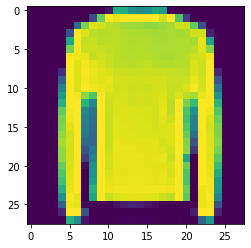

정답: Bag
예측: Bag


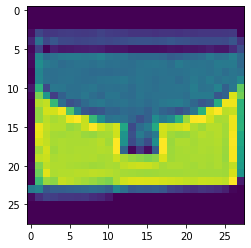

정답: Coat
예측: Coat


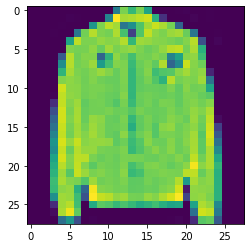

정답: Trouser
예측: Trouser


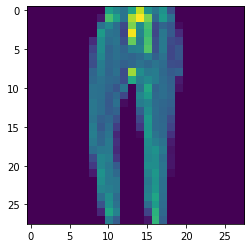

정답: Bag
예측: Bag


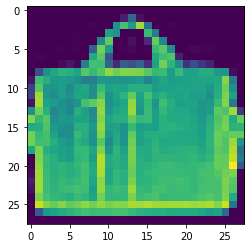

정답: Sandal
예측: Sandal


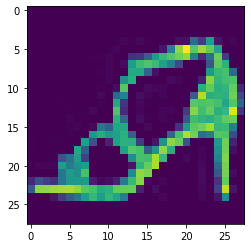

정답: Ankel boot
예측: Ankel boot


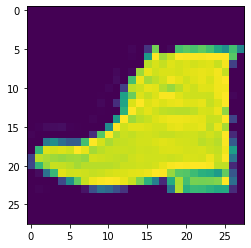

정답: Sandal
예측: Sandal


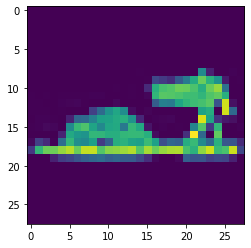

정답: T-shirt/top
예측: T-shirt/top


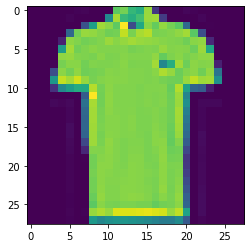

정답: Dress
예측: Dress


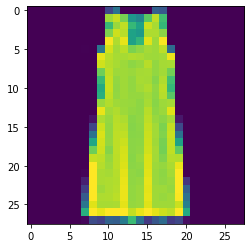

정답: Pullover
예측: Pullover


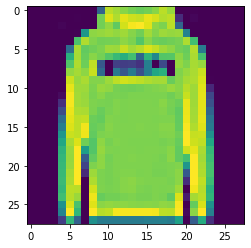

정답: T-shirt/top
예측: T-shirt/top


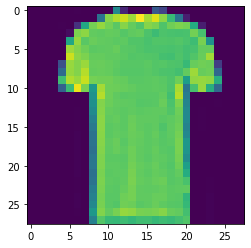

정답: Shirt
예측: Pullover


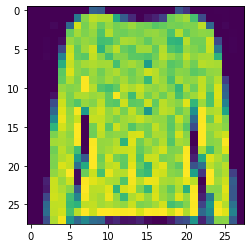

정답: Sandal
예측: Sandal


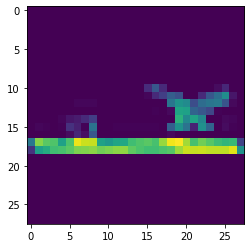

정답: Dress
예측: Dress


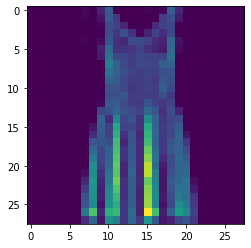

정답: Shirt
예측: Shirt


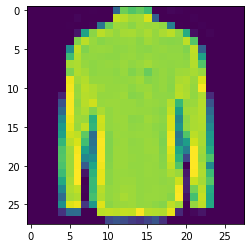

정답: Sneaker
예측: Sneaker


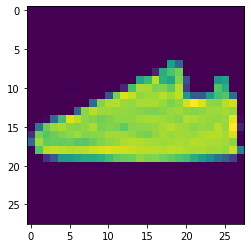

정답: Trouser
예측: Trouser


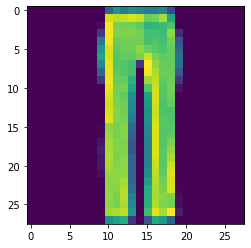

정답: Bag
예측: Bag


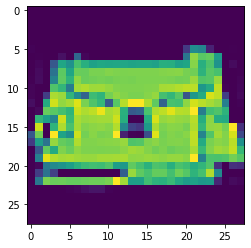

정답: T-shirt/top
예측: T-shirt/top


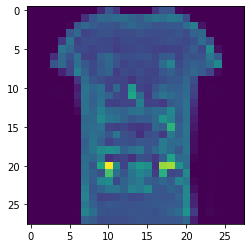

정답: Trouser
예측: Trouser


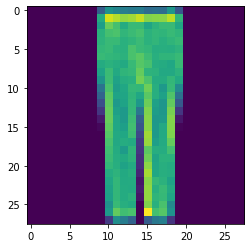

정답: Coat
예측: Coat


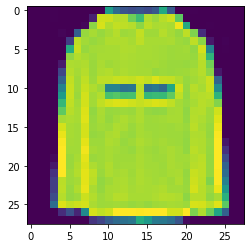

정답: Pullover
예측: Pullover


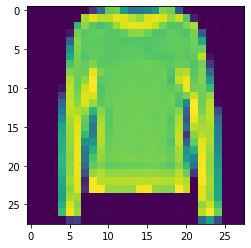

In [ ]:
for idx in range(100):

 print('정답:',labels[y_test[idx]])
 print('예측:',labels[y_argmax[idx]])
 plt.imshow(x_test[idx])
 plt.show()

## 과제 2. 동물 및 물체 이미지 분류
---
* 데이터셋 : cifar-10
* 데이터의 형태를 파악하세요
* 적절한 모델을 생성하세요
* 데이터를 학습하세요.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

In [22]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [23]:
labels = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

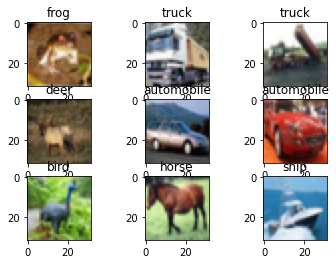

In [24]:
# 데이터구경(for문)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(labels[y_train[i][0]] ) #(50000,1) ,1이라서 리스트로 되어있는게 5만개라 [0]써줘야함

In [25]:
x_train,x_test = x_train/255.0,x_test/255.0

In [27]:
from tensorflow.keras import layers, models

In [28]:
def create_cifar():
  x = layers.Input(shape=(32,32,3))
  y = layers.Conv2D(filters=6, 
                    kernel_size=5 , padding = 'same',
                    activation='tanh'
                    )(x)
  y = layers.AvgPool2D(pool_size=2, strides=2)(y)    #subsampling          
  y = layers.Conv2D(filters=16, 
                    kernel_size=5 , padding = 'valid',
                    activation='tanh'
                    )(y) 
  y = layers.MaxPool2D(pool_size=2, strides=2)(y)
  y = layers.Flatten()(y)
  y = layers.Dense(120, activation= 'tanh')(y)  
  y = layers.Dense(84, activation= 'tanh')(y)                                                                       
  y = layers.Dense(10, activation= 'softmax')(y)

  model = models.Model(x,y,name='cifar10') 
  return model    

cifar_10 = create_cifar()
cifar_10.summary()    

Model: "cifar10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0   

In [29]:
cifar_10.compile(loss= 'sparse_categorical_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])
cifar_10.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.8887 - acc: 0.3233
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5813 - acc: 0.4364
Epoch 3/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.4446 - acc: 0.4854
Epoch 4/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.3621 - acc: 0.5164
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.2917 - acc: 0.5420
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2308 - acc: 0.5641
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1823 - acc: 0.5813
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1440 - acc: 0.5937
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1104 - acc: 0.6079
Epoch 10/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0779 - acc: 0.6200


(10000, 10)
정답: cat
예측: [0.00831925 0.01311664 0.03134637 0.53755677 0.02648856 0.12502128
 0.04755487 0.00100705 0.2029454  0.00664385]


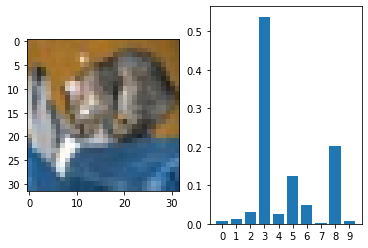

In [32]:
y_pred = cifar_10.predict(x_test)
print(y_pred.shape)
#0번째 샘플에 대해
print('정답:',labels[y_test[0][0]])
print('예측:',y_pred[0])
plt.subplot(121)
plt.imshow(x_test[0])
plt.subplot(122)
plt.bar(range(10), y_pred[0])
plt.xticks(range(10))
plt.show()

In [33]:
y_argmax = np.argmax(y_pred, axis=1)
print(y_argmax[0])

3


정답: cat
예측: cat


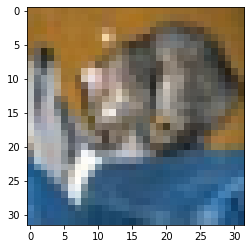

정답: ship
예측: airplane


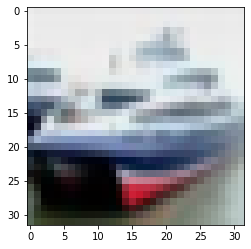

정답: ship
예측: automobile


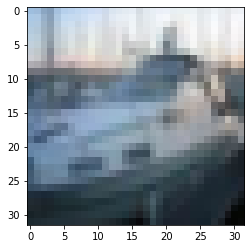

정답: airplane
예측: airplane


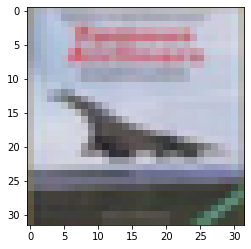

정답: frog
예측: frog


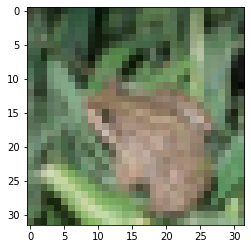

정답: frog
예측: frog


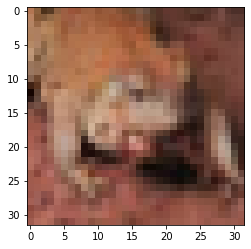

정답: automobile
예측: automobile


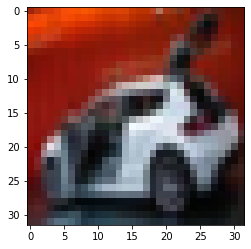

정답: frog
예측: frog


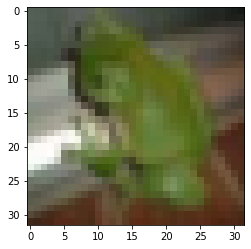

정답: cat
예측: cat


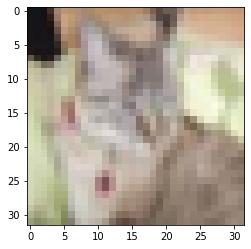

정답: automobile
예측: automobile


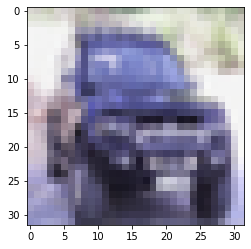

정답: airplane
예측: deer


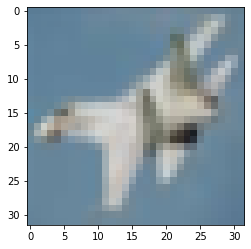

정답: truck
예측: truck


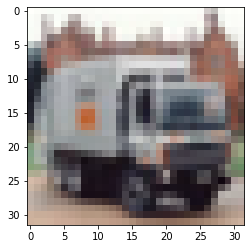

정답: dog
예측: cat


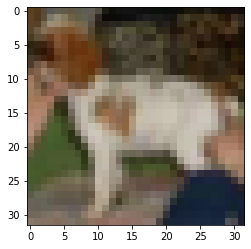

정답: horse
예측: horse


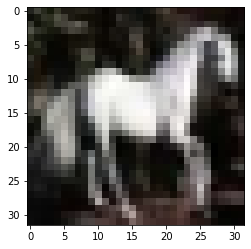

정답: truck
예측: truck


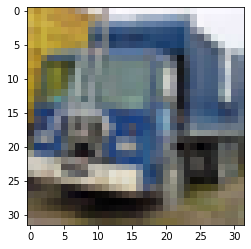

정답: ship
예측: ship


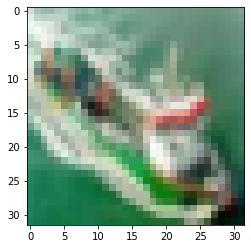

정답: dog
예측: dog


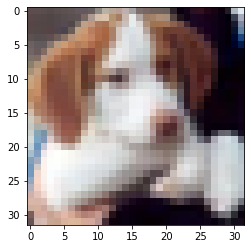

정답: horse
예측: cat


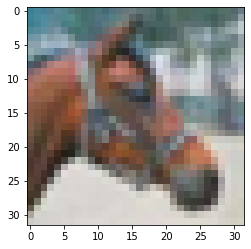

정답: ship
예측: ship


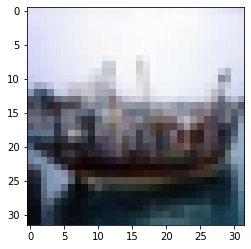

정답: frog
예측: frog


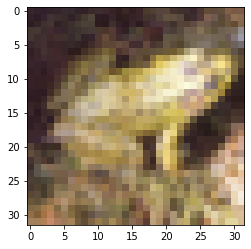

정답: horse
예측: horse


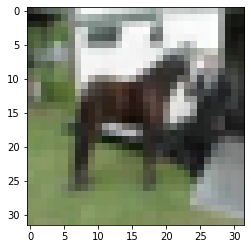

정답: airplane
예측: airplane


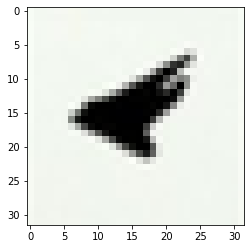

정답: deer
예측: bird


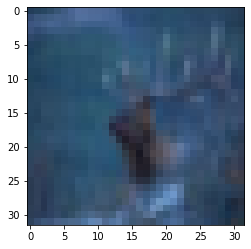

정답: truck
예측: truck


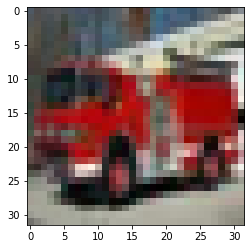

정답: dog
예측: deer


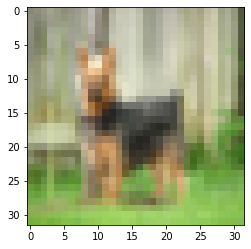

정답: bird
예측: deer


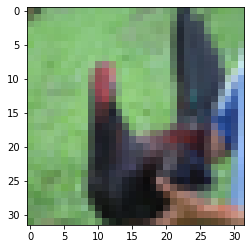

정답: deer
예측: deer


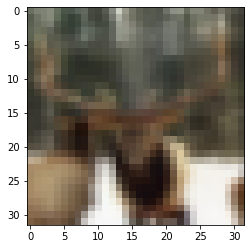

정답: airplane
예측: airplane


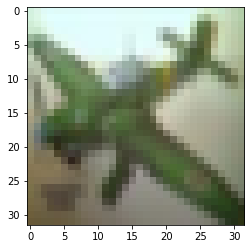

정답: truck
예측: automobile


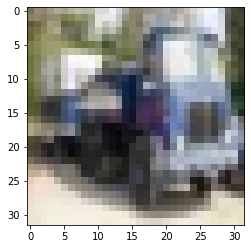

정답: frog
예측: frog


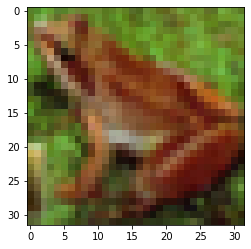

정답: frog
예측: frog


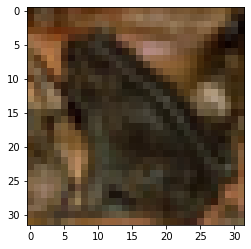

정답: dog
예측: dog


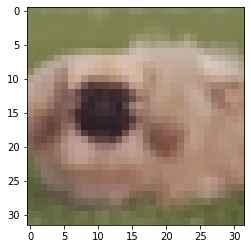

정답: deer
예측: deer


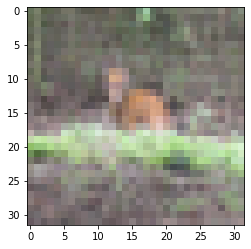

정답: dog
예측: cat


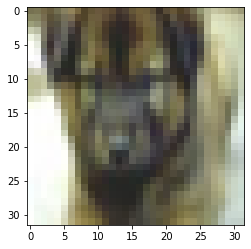

정답: truck
예측: truck


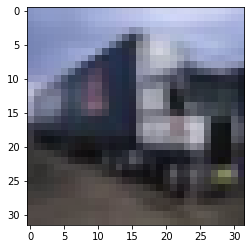

정답: bird
예측: frog


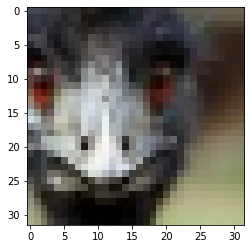

정답: deer
예측: deer


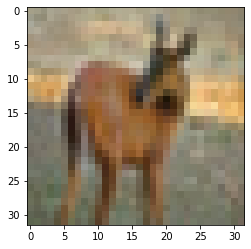

정답: automobile
예측: automobile


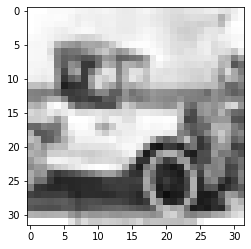

정답: truck
예측: truck


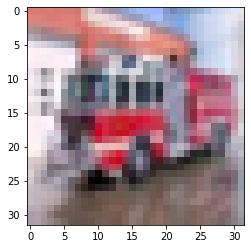

정답: dog
예측: cat


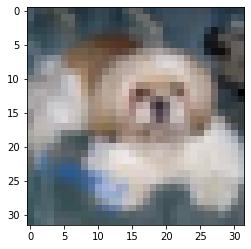

정답: deer
예측: airplane


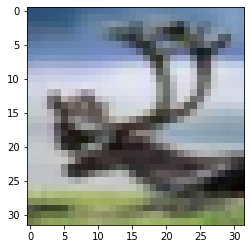

정답: frog
예측: frog


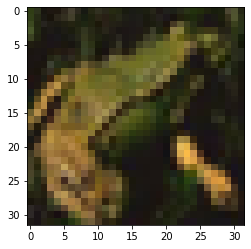

정답: dog
예측: dog


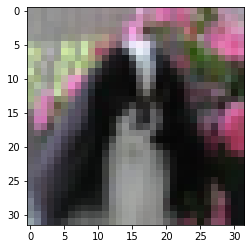

정답: frog
예측: frog


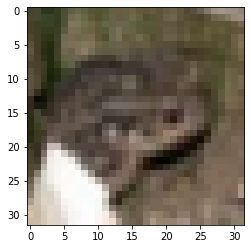

정답: airplane
예측: airplane


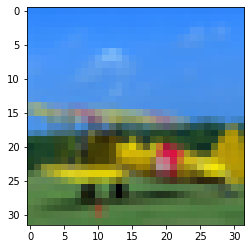

정답: truck
예측: truck


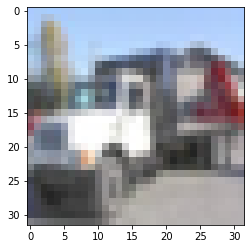

정답: cat
예측: cat


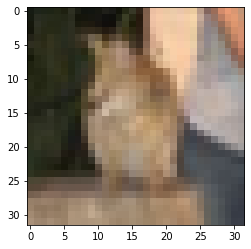

정답: truck
예측: horse


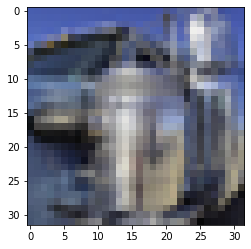

정답: horse
예측: horse


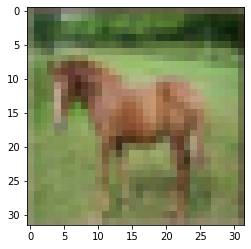

정답: frog
예측: frog


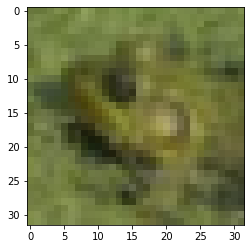

정답: truck
예측: truck


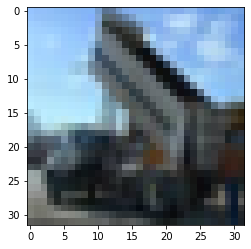

정답: ship
예측: ship


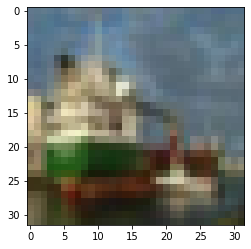

정답: airplane
예측: frog


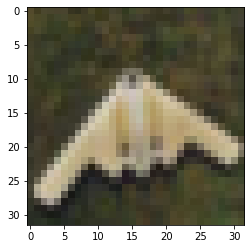

정답: cat
예측: cat


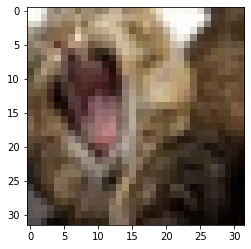

정답: ship
예측: ship


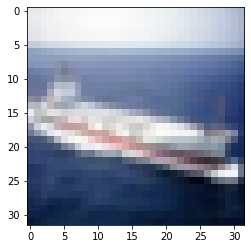

정답: ship
예측: ship


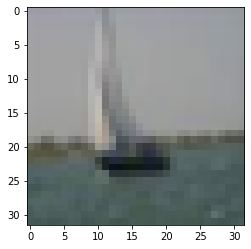

정답: horse
예측: dog


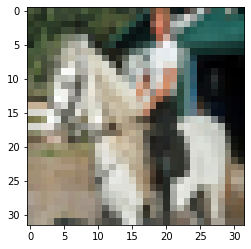

정답: horse
예측: frog


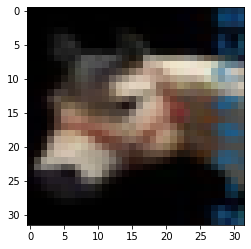

정답: deer
예측: frog


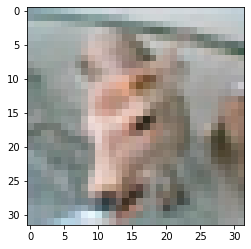

정답: frog
예측: cat


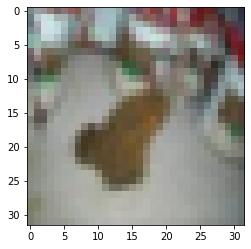

정답: horse
예측: horse


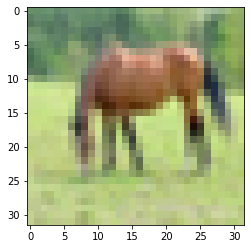

정답: cat
예측: cat


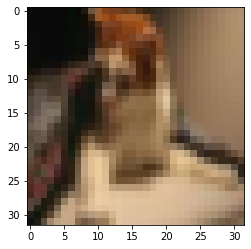

정답: frog
예측: frog


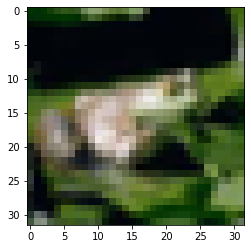

정답: cat
예측: truck


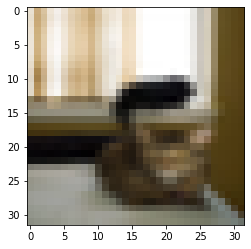

정답: frog
예측: frog


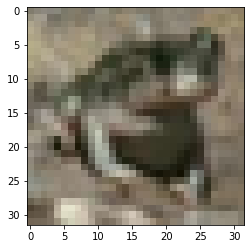

정답: bird
예측: bird


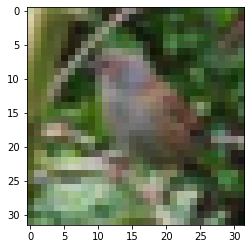

정답: automobile
예측: automobile


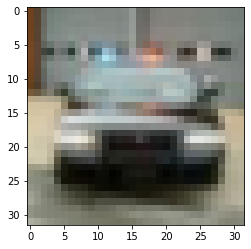

정답: bird
예측: airplane


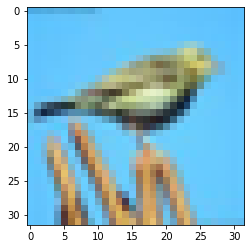

정답: cat
예측: dog


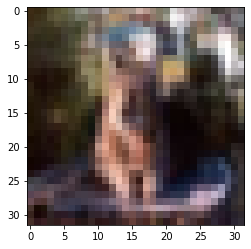

정답: horse
예측: truck


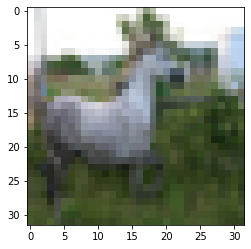

정답: bird
예측: bird


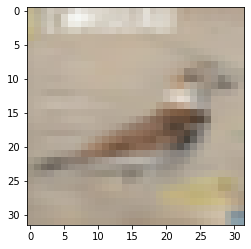

정답: frog
예측: frog


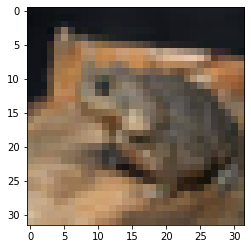

정답: ship
예측: ship


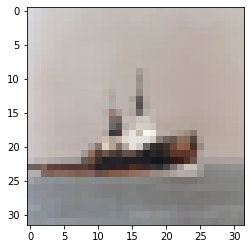

정답: ship
예측: ship


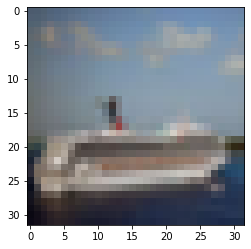

정답: airplane
예측: airplane


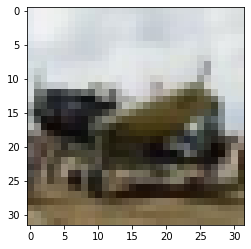

정답: bird
예측: bird


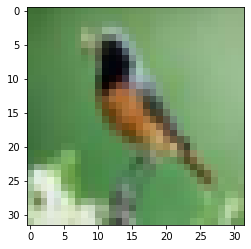

정답: truck
예측: airplane


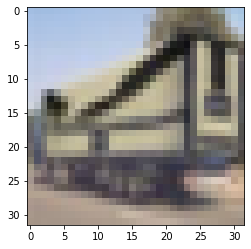

정답: cat
예측: cat


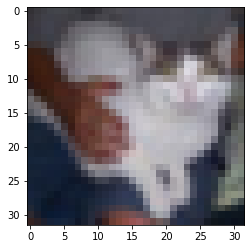

정답: cat
예측: cat


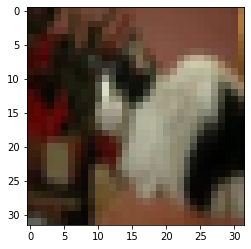

정답: ship
예측: ship


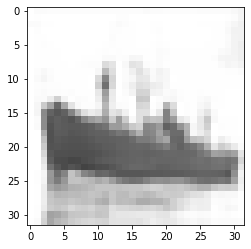

정답: ship
예측: ship


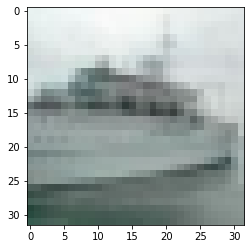

정답: automobile
예측: automobile


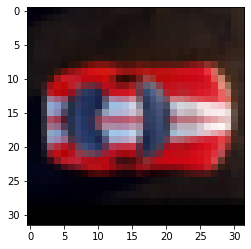

정답: automobile
예측: automobile


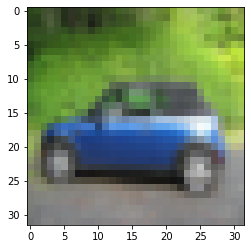

정답: horse
예측: horse


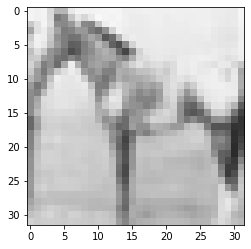

정답: bird
예측: bird


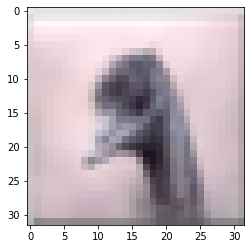

정답: dog
예측: horse


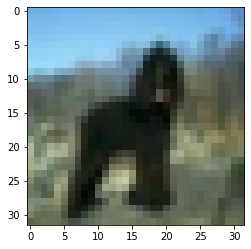

정답: bird
예측: bird


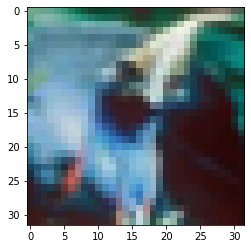

정답: horse
예측: ship


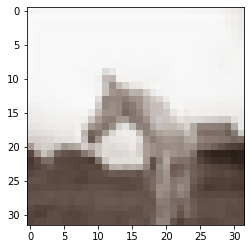

정답: ship
예측: ship


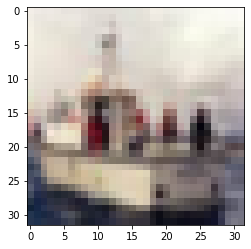

정답: truck
예측: truck


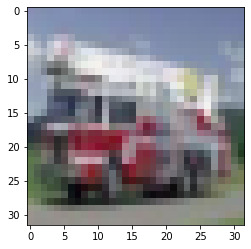

정답: airplane
예측: airplane


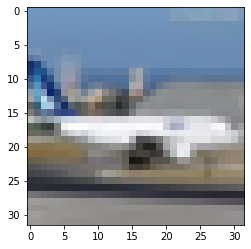

정답: cat
예측: bird


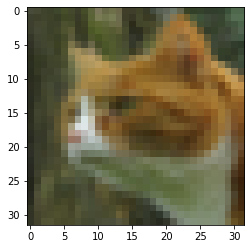

정답: ship
예측: ship


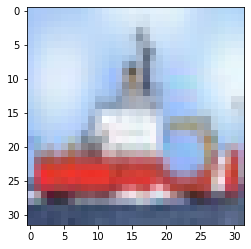

정답: frog
예측: frog


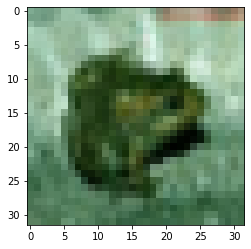

정답: deer
예측: deer


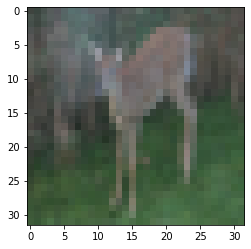

정답: frog
예측: frog


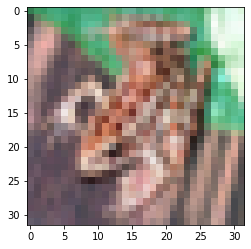

정답: frog
예측: frog


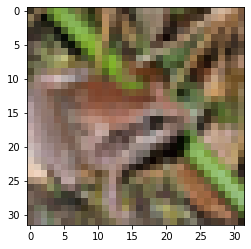

정답: airplane
예측: ship


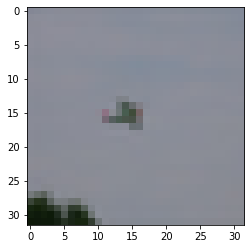

정답: airplane
예측: airplane


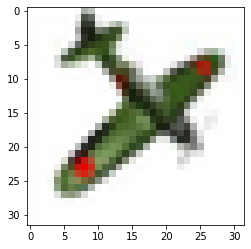

정답: horse
예측: horse


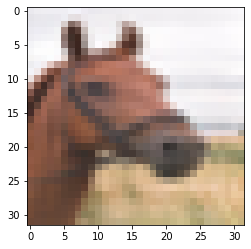

In [36]:
for idx in range(100):

 print('정답:',labels[y_test[idx][0]])
 print('예측:',labels[y_argmax[idx]])
 plt.imshow(x_test[idx])
 plt.show()